In [80]:
import pandas as pd
import numpy as np
from collections import Counter
import math
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
table_1 = pd.read_csv(r"C:\Users\Nursulu_1\Downloads\BMW_intern_GenAI_coding_task_orig\BMW_intern_GenAI_coding_task\data\table_1.csv", sep=';')
table_2 = pd.read_csv(r"C:\Users\Nursulu_1\Downloads\BMW_intern_GenAI_coding_task_orig\BMW_intern_GenAI_coding_task\data\table_2.csv", sep=';')

Extract features by ID and map them to labels.

In [3]:
table_2

,POUG,TRE,ID,ZUB,VOL,UIO,VBNM,Type,OIN
0,1,1.750,0,t,f,uuuu,t,n,17.92
1,0,0.290,1,f,f,wwww,f,n,16.92
2,1,0.000,2,f,f,wwww,t,n,31.25
3,0,0.335,3,f,f,uuuu,f,n,48.17
4,0,0.500,4,t,f,wwww,f,n,32.33
...,...,...,...,...,...,...,...,...,...
4065,14,5.500,3314,f,t,uuuu,t,y,52.83
4066,7,0.750,999,f,t,uuuu,t,y,19.17
4067,0,5.000,2415,t,t,uuuu,f,y,36.75
4068,0,0.835,511,f,t,wwww,f,y,23.25


In [4]:
id_order = list(table_2['ID'])

In [5]:
len(id_order)

4070

In [6]:
len(set(id_order))

3700

In [7]:
table_2[table_2['ID']==305]

,POUG,TRE,ID,ZUB,VOL,UIO,VBNM,Type,OIN
305,0,3.25,305,f,f,uuuu,f,n,22.25
3784,0,3.25,305,f,f,uuuu,f,n,22.25
3827,0,3.25,305,f,f,uuuu,f,n,22.25
4044,0,3.25,305,f,f,uuuu,f,n,22.25


Remove duplicates

In [8]:
table_2 = table_2.drop_duplicates(subset=['ID'])
table_1 = table_1.drop_duplicates(subset=['ID'])

In [9]:
len(table_2)

3700

In [10]:
id_order = list(table_2['ID'])

In [11]:
table_1['ID'] = pd.Categorical(table_1['ID'], categories=id_order, ordered=False)

In [12]:
table_2

,POUG,TRE,ID,ZUB,VOL,UIO,VBNM,Type,OIN
0,1,1.750,0,t,f,uuuu,t,n,17.92
1,0,0.290,1,f,f,wwww,f,n,16.92
2,1,0.000,2,f,f,wwww,t,n,31.25
3,0,0.335,3,f,f,uuuu,f,n,48.17
4,0,0.500,4,t,f,wwww,f,n,32.33
...,...,...,...,...,...,...,...,...,...
3695,5,2.710,3695,f,t,uuuu,t,y,18.75
3696,5,8.500,3696,t,t,uuuu,t,y,23.50
3697,12,4.500,3697,t,t,wwww,t,y,34.17
3698,5,3.750,3698,t,t,wwww,t,y,27.83


In [13]:
table_1

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq
2,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh
3,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq
4,4,40,oooo,y,oooo,www,0.0,mmm,232.0,2320000.0,qqqq
...,...,...,...,...,...,...,...,...,...,...,...
3695,3695,74,oooo,x,oooo,www,26726.0,sss,NaN,NaN,qqqq
3696,3696,179,oooo,x,oooo,www,0.0,sss,120.0,1200000.0,qqqq
3697,3697,82,oooo,NaN,oooo,www,221.0,vvvv,0.0,0.0,qqqq
3698,3698,13,oooo,NaN,oooo,www,3.0,yyy,100.0,1000000.0,qqqq


Merge tables

In [14]:
data = pd.merge(table_1, table_2, on='ID', how='inner')

In [15]:
data

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG,POUG,TRE,ZUB,VOL,UIO,VBNM,Type,OIN
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq,1,1.750,t,f,uuuu,t,n,17.92
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq,0,0.290,f,f,wwww,f,n,16.92
2,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh,1,0.000,f,f,wwww,t,n,31.25
3,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq,0,0.335,f,f,uuuu,f,n,48.17
4,4,40,oooo,y,oooo,www,0.0,mmm,232.0,2320000.0,qqqq,0,0.500,t,f,wwww,f,n,32.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,3695,74,oooo,x,oooo,www,26726.0,sss,NaN,NaN,qqqq,5,2.710,f,t,uuuu,t,y,18.75
3696,3696,179,oooo,x,oooo,www,0.0,sss,120.0,1200000.0,qqqq,5,8.500,t,t,uuuu,t,y,23.50
3697,3697,82,oooo,NaN,oooo,www,221.0,vvvv,0.0,0.0,qqqq,12,4.500,t,t,wwww,t,y,34.17
3698,3698,13,oooo,NaN,oooo,www,3.0,yyy,100.0,1000000.0,qqqq,5,3.750,t,t,wwww,t,y,27.83


Let's examine each feature type

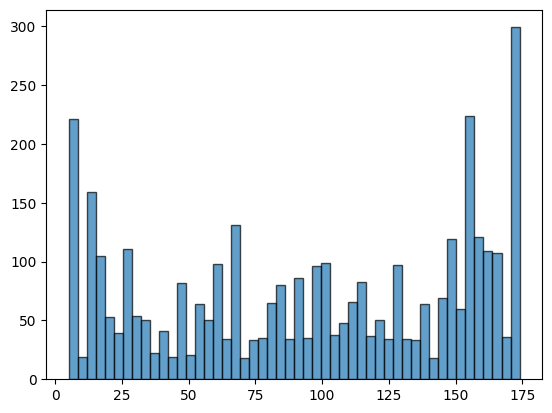

1
179
95.68837837837837
99.0
0    1
Name: UKL, dtype: int64


In [37]:
#UKL: ints, range
plt.hist(list(data_with_dummies['UKL']), bins=50, edgecolor='black', alpha=0.7)
plt.show()
print(min(list(data['UKL'])))
print(max(list(data['UKL'])))
print(np.mean(list(data['UKL'])))
print(data['UKL'].median())
print(data['UKL'].mode())

In [17]:
#GJAH
Counter(list(data["GJAH"]))

Counter({'oooo': 3055, 'rrr': 549, nan: 64, 'ii': 32})

In [18]:
#GJAH
Counter(list(data["ZIK"]))

Counter({'x': 1023, nan: 2145, 'y': 532})

ZIK feature seems not so useful, as the majority samples don't have any value for it.

In [28]:
#GJAH
Counter(list(data["HUI"]))

Counter({'oooo': 3430, 'uuu': 189, 'rrr': 81})

In [31]:
#GJAH
Counter(list(data["ERZ"]))

Counter({'www': 3055, 'pppp': 549, nan: 64, 'nnn': 32})

0.0
100000.0
2246.705945945946
113.0
0    0.0
Name: CDx, dtype: float64


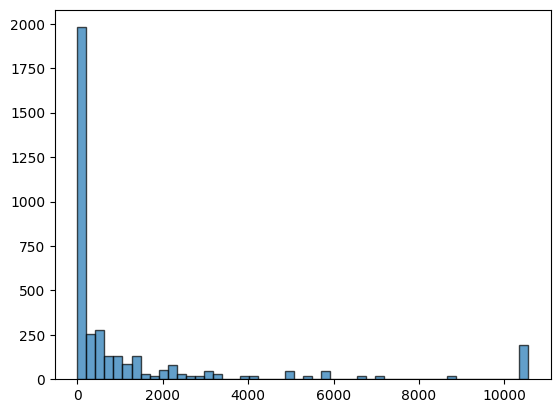

In [36]:
#CDx

print(min(list(data['CDx'])))
print(max(list(data['CDx'])))
print(np.mean(list(data['CDx'])))
print(data['CDx'].median())
print(data['CDx'].mode())


plt.hist(list(data_with_dummies['CDx']), bins=50, edgecolor='black', alpha=0.7)
plt.show()

In [34]:
Counter(list(data["BJZHD"]))

Counter({'vvvv': 787,
         'mmm': 170,
         'hh': 136,
         'kkk': 191,
         'lll': 39,
         'sss': 612,
         'yyy': 457,
         'ooo': 179,
         'ee': 553,
         'xxx': 33,
         'zzz': 340,
         'ggg': 137,
         nan: 66})

0.0
1160.0
158.29783783783785
120.0
0    0.0
Name: NKJUD, dtype: float64


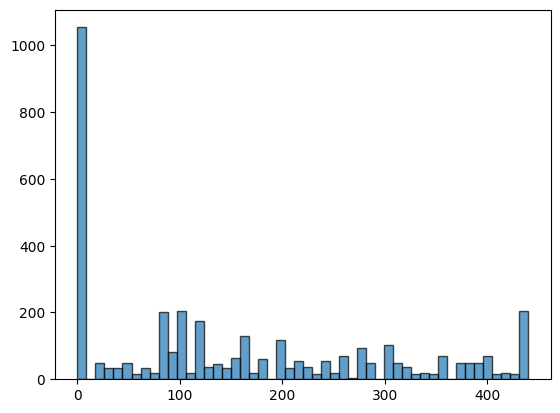

In [35]:
print(min(list(data['NKJUD'])))
print(max(list(data['NKJUD'])))
print(np.mean(list(data['NKJUD'])))
print(data['NKJUD'].median())
print(data['NKJUD'].mode())

plt.hist(list(data_with_dummies['NKJUD']), bins=50, edgecolor='black', alpha=0.7)
plt.show()

0.0
11600000.0
1582978.3783783785
1200000.0
0    0.0
Name: LPI, dtype: float64


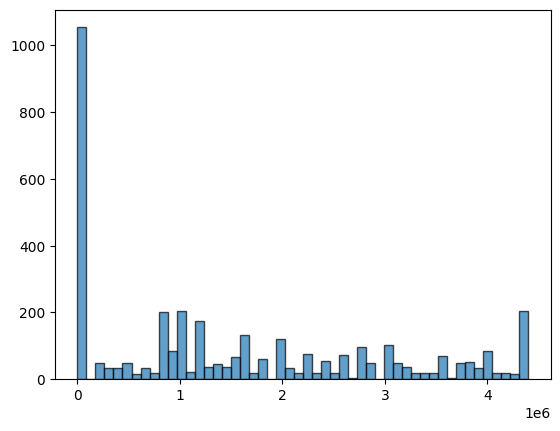

In [34]:
print(min(list(data['LPI'])))
print(max(list(data['LPI'])))
print(np.mean(list(data['LPI'])))
print(data['LPI'].median())
print(data['LPI'].mode())

plt.hist(list(data_with_dummies['LPI']), bins=50, edgecolor='black', alpha=0.7)
plt.show()

In [57]:
Counter(list(data["BJKG"]))

Counter({'qqqq': 2081,
         'hh': 154,
         'qqq': 17,
         'hhhh': 970,
         'lll': 37,
         'yy': 359,
         'ppp': 33,
         'bbb': 49})

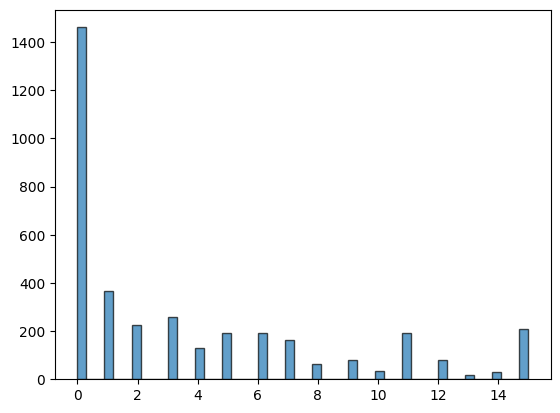

In [33]:
Counter(list(data["POUG"]))

plt.hist(list(data_with_dummies['POUG']), bins=50, edgecolor='black', alpha=0.7)
plt.show()

0.0
28.5
3.4394959459459455
1.75
0.0


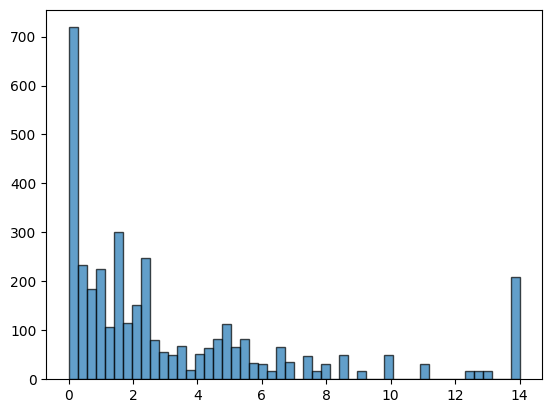

In [32]:
print(min(list(data['TRE'])))
print(max(list(data['TRE'])))
print(np.mean(list(data['TRE'])))
print(data['TRE'].median())
print(data['TRE'].mode().iloc[0])

plt.hist(list(data_with_dummies['TRE']), bins=50, edgecolor='black', alpha=0.7)
plt.show()


In [52]:
a = data['TRE'].mode()

In [53]:
a

0    0.0
Name: TRE, dtype: float64

In [43]:
Counter(list(data["ZUB"]))

Counter({'t': 1776, 'f': 1924})

In [44]:
Counter(list(data["VOL"]))

Counter({'f': 529, 't': 3171})

In [45]:
Counter(list(data["UIO"]))

Counter({'uuuu': 1279, 'wwww': 2382, nan: 39})

In [46]:
Counter(list(data["VBNM"]))

Counter({'t': 2239, 'f': 1461})

In [51]:
print(min(list(data['OIN'])))
print(max(list(data['OIN'])))
print(np.mean(list(data['OIN'])))
print(data['OIN'].median())
print(data['OIN'].mode())

13.75
80.25
True
28.67
0    23.25
Name: OIN, dtype: float64


In [49]:
Counter(list(data["Type"]))

Counter({'n': 276, 'y': 3424})

There is a major class imbalance. Even if we build a model that only predicts yes", we will be right in almost 92% percent of cases.

In [83]:
100 - 276/3424*100

91.9392523364486

Impute missing values of the numerical features, for example by replacing them with the mean value for the respective feature.

In [16]:
# Iterate through rows of the penguins df
for index, row in data.iterrows():
    for column_name, value in row.items():
        # Check for NaN values
        if isinstance(value, (int, float)) and math.isnan(value):
            try:
                # replace NaN values of numerical features with the mean value for the respective feature over all data
                mode_value = data[column_name].mode().iloc[0]
                data.at[index, column_name] = mode_value
                # if the NaN value is a non-numerical feature, don't do anything
            except TypeError:
                continue

Check if variables are correlated

In [22]:
feature_floats = data.select_dtypes(include=['float64'])

In [23]:
feature_names = list(feature_floats.columns)

In [24]:
correlations = data[feature_names].corr()

In [25]:
correlations

,CDx,NKJUD,LPI,TRE,OIN
CDx,1.000000,0.145232,0.145232,-0.004123,-0.007921
NKJUD,0.145232,1.000000,1.000000,-0.195718,-0.149966
LPI,0.145232,1.000000,1.000000,-0.195718,-0.149966
TRE,-0.004123,-0.195718,-0.195718,1.000000,0.511143
OIN,-0.007921,-0.149966,-0.149966,0.511143,1.000000


In [26]:
data.columns

Index(['ID', 'UKL', 'GJAH', 'ZIK', 'HUI', 'ERZ', 'CDx', 'BJZHD', 'NKJUD',
       'LPI', 'BJKG', 'POUG', 'TRE', 'ZUB', 'VOL', 'UIO', 'VBNM', 'Type',
       'OIN'],
      dtype='object')

In [72]:
from sklearn.preprocessing import LabelEncoder

In [74]:
data.head()

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG,POUG,TRE,ZUB,VOL,UIO,VBNM,Type,OIN
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq,1,1.750,t,f,uuuu,t,n,17.92
1,1,153,rrr,x,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq,0,0.290,f,f,wwww,f,n,16.92
2,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh,1,0.000,f,f,wwww,t,n,31.25
3,3,9,oooo,x,oooo,www,120.0,kkk,0.0,0.0,qqq,0,0.335,f,f,uuuu,f,n,48.17
4,4,40,oooo,y,oooo,www,0.0,mmm,232.0,2320000.0,qqqq,0,0.500,t,f,wwww,f,n,32.33


In [76]:
features_object = data.select_dtypes(include=['object'])

In [78]:
df_corr = data
# Encode categorical features
label_encoder = LabelEncoder()

for col in features_object:
    df_corr[col] = label_encoder.fit_transform(df_corr[col])

# Compute the correlation matrix
correlation_matrix = df_corr.corr()
print(correlation_matrix)

             ID       UKL      GJAH       ZIK       HUI       ERZ       CDx  \
ID     1.000000  0.014324 -0.064574 -0.084820 -0.026516  0.054450  0.025607   
UKL    0.014324  1.000000 -0.153489 -0.005195 -0.103472  0.085023  0.017122   
GJAH  -0.064574 -0.153489  1.000000  0.028384 -0.057361 -0.738061 -0.167611   
ZIK   -0.084820 -0.005195  0.028384  1.000000  0.204673 -0.187237  0.075438   
HUI   -0.026516 -0.103472 -0.057361  0.204673  1.000000 -0.143220  0.038454   
ERZ    0.054450  0.085023 -0.738061 -0.187237 -0.143220  1.000000 -0.203215   
CDx    0.025607  0.017122 -0.167611  0.075438  0.038454 -0.203215  1.000000   
BJZHD  0.026066 -0.061222  0.123224  0.015256  0.029938 -0.021287 -0.122146   
NKJUD -0.020351  0.030814  0.096362  0.049817  0.011977 -0.181914  0.145232   
LPI   -0.020351  0.030814  0.096362  0.049817  0.011977 -0.181914  0.145232   
BJKG   0.009677 -0.053672  0.035539 -0.004047  0.098792  0.020970  0.030955   
POUG   0.073644  0.070091 -0.036577 -0.252567 -0.153

Create dummy variables for categorical variables

In [17]:
print(data.dtypes)

ID         int64
UKL        int64
GJAH      object
ZIK       object
HUI       object
ERZ       object
CDx      float64
BJZHD     object
NKJUD    float64
LPI      float64
BJKG      object
POUG       int64
TRE      float64
ZUB       object
VOL       object
UIO       object
VBNM      object
Type      object
OIN      float64
dtype: object


In [18]:
features_object = data.select_dtypes(include=['object'])
features_object_names = list(features_object.columns)

In [19]:
features_object_names

['GJAH',
 'ZIK',
 'HUI',
 'ERZ',
 'BJZHD',
 'BJKG',
 'ZUB',
 'VOL',
 'UIO',
 'VBNM',
 'Type']

In [20]:
data_with_dummies = pd.get_dummies(data, columns=features_object_names, drop_first=True) # drop_first=True to avoid multicollinearity

In [21]:
data_with_dummies

,ID,UKL,CDx,NKJUD,LPI,POUG,TRE,OIN,GJAH_oooo,GJAH_rrr,...,BJKG_lll,BJKG_ppp,BJKG_qqq,BJKG_qqqq,BJKG_yy,ZUB_t,VOL_t,UIO_wwww,VBNM_t,Type_y
0,0,160,5.0,80.0,800000.0,1,1.750,17.92,True,False,...,False,False,False,True,False,True,False,False,True,False
1,1,153,0.0,200.0,2000000.0,0,0.290,16.92,False,True,...,False,False,False,True,False,False,False,True,False,False
2,2,5,19.0,96.0,960000.0,1,0.000,31.25,True,False,...,False,False,False,False,False,False,False,True,True,False
3,3,9,120.0,0.0,0.0,0,0.335,48.17,True,False,...,False,False,True,False,False,False,False,False,False,False
4,4,40,0.0,232.0,2320000.0,0,0.500,32.33,True,False,...,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,3695,74,26726.0,0.0,0.0,5,2.710,18.75,True,False,...,False,False,False,True,False,False,True,False,True,True
3696,3696,179,0.0,120.0,1200000.0,5,8.500,23.50,True,False,...,False,False,False,True,False,True,True,False,True,True
3697,3697,82,221.0,0.0,0.0,12,4.500,34.17,True,False,...,False,False,False,True,False,True,True,True,True,True
3698,3698,13,3.0,100.0,1000000.0,5,3.750,27.83,True,False,...,False,False,False,True,False,True,True,True,True,True


TODO: Check for the outliers

do capping or log transformation

In [25]:
from scipy.stats.mstats import winsorize

In [22]:
features_numerical = data.select_dtypes(include=['int64', 'float64'])
features_numerical_names = list(features_numerical.columns)
#drop the ID column
features_numerical_names = features_numerical_names[1:]

In [23]:
features_numerical_names

['UKL', 'CDx', 'NKJUD', 'LPI', 'POUG', 'TRE', 'OIN']

In [30]:
# Apply Winsorization to each numerical feature
for feature in features_numerical_names:
    data_with_dummies[feature] = winsorize(data_with_dummies[feature], limits=[0.05, 0.05])

In [31]:
data_with_dummies

,ID,UKL,CDx,NKJUD,LPI,POUG,TRE,OIN,GJAH_oooo,GJAH_rrr,...,BJKG_lll,BJKG_ppp,BJKG_qqq,BJKG_qqqq,BJKG_yy,ZUB_t,VOL_t,UIO_wwww,VBNM_t,Type_y
0,0,160,5.0,80.0,800000.0,1,1.750,18.75,True,False,...,False,False,False,True,False,True,False,False,True,False
1,1,153,0.0,200.0,2000000.0,0,0.290,18.75,False,True,...,False,False,False,True,False,False,False,True,False,False
2,2,5,19.0,96.0,960000.0,1,0.000,31.25,True,False,...,False,False,False,False,False,False,False,True,True,False
3,3,9,120.0,0.0,0.0,0,0.335,48.17,True,False,...,False,False,True,False,False,False,False,False,False,False
4,4,40,0.0,232.0,2320000.0,0,0.500,32.33,True,False,...,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,3695,74,10561.0,0.0,0.0,5,2.710,18.75,True,False,...,False,False,False,True,False,False,True,False,True,True
3696,3696,174,0.0,120.0,1200000.0,5,8.500,23.50,True,False,...,False,False,False,True,False,True,True,False,True,True
3697,3697,82,221.0,0.0,0.0,12,4.500,34.17,True,False,...,False,False,False,True,False,True,True,True,True,True
3698,3698,13,3.0,100.0,1000000.0,5,3.750,27.83,True,False,...,False,False,False,True,False,True,True,True,True,True


Use StandardScaler (Standardization) instead of MinMaxScaler (from 0 to 1) because if there are outliers, the majority of the values will be squeezed in a small range. Also we don't know from the data what are "natural bounds" of variables (like range of the pixel values, temperature, etc.)

In [38]:
# Initialize the StandardScaler
scaler = StandardScaler()

 # Replace this with the actual numerical columns
data_with_dummies[features_numerical_names] = scaler.fit_transform(data_with_dummies[features_numerical_names])

In [39]:
# to convert True/False into 0/1

In [40]:
# to convert True/False into 0/1
boolean_columns = data_with_dummies.select_dtypes(include='bool').columns
data_with_dummies[boolean_columns] = data_with_dummies[boolean_columns].astype(int)

In [41]:
data_with_dummies

,ID,UKL,CDx,NKJUD,LPI,POUG,TRE,OIN,GJAH_oooo,GJAH_rrr,...,BJKG_lll,BJKG_ppp,BJKG_qqq,BJKG_qqqq,BJKG_yy,ZUB_t,VOL_t,UIO_wwww,VBNM_t,Type_y
0,0,1.150054,-0.487452,-0.513130,-0.513130,-0.593147,-0.406145,-1.168801,1,0,...,0,0,0,1,0,1,0,0,1,0
1,1,1.024808,-0.489384,0.322274,0.322274,-0.810267,-0.791563,-1.168801,0,1,...,0,0,0,1,0,0,0,1,0,0
2,2,-1.623253,-0.482043,-0.401743,-0.401743,-0.593147,-0.868119,-0.104162,1,0,...,0,0,0,0,0,0,0,1,1,0
3,3,-1.551683,-0.443016,-1.070065,-1.070065,-0.810267,-0.779684,1.336932,1,0,...,0,0,1,0,0,0,0,0,0,0
4,4,-0.997022,-0.489384,0.545048,0.545048,-0.810267,-0.736126,-0.012178,1,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,3695,-0.388684,3.591366,-1.070065,-1.070065,0.275331,-0.152719,-1.168801,1,0,...,0,0,0,1,0,0,1,0,1,1
3696,3696,1.400547,-0.489384,-0.234662,-0.234662,0.275331,1.375756,-0.764238,1,0,...,0,0,0,1,0,1,1,0,1,1
3697,3697,-0.245545,-0.403990,-1.070065,-1.070065,1.795169,0.319815,0.144537,1,0,...,0,0,0,1,0,1,1,1,1,1
3698,3698,-1.480114,-0.488225,-0.373896,-0.373896,0.275331,0.121826,-0.395447,1,0,...,0,0,0,1,0,1,1,1,1,1


In [42]:
correlation_matrix = data_with_dummies.corr()

Hypothesis testing - is at least 1 pred useful?

In [44]:
import statsmodels.api as sm

In [45]:
data_with_dummies.columns

Index(['ID', 'UKL', 'CDx', 'NKJUD', 'LPI', 'POUG', 'TRE', 'OIN', 'GJAH_oooo',
       'GJAH_rrr', 'ZIK_y', 'HUI_rrr', 'HUI_uuu', 'ERZ_pppp', 'ERZ_www',
       'BJZHD_ggg', 'BJZHD_hh', 'BJZHD_kkk', 'BJZHD_lll', 'BJZHD_mmm',
       'BJZHD_ooo', 'BJZHD_sss', 'BJZHD_vvvv', 'BJZHD_xxx', 'BJZHD_yyy',
       'BJZHD_zzz', 'BJKG_hh', 'BJKG_hhhh', 'BJKG_lll', 'BJKG_ppp', 'BJKG_qqq',
       'BJKG_qqqq', 'BJKG_yy', 'ZUB_t', 'VOL_t', 'UIO_wwww', 'VBNM_t',
       'Type_y'],
      dtype='object')

In [46]:
predictors = list(data_with_dummies.columns)
predictors.remove("ID")
predictors.remove("Type_y")


In [47]:
# Define the dependent variable and predictors
X = data_with_dummies[predictors]
y = data_with_dummies['Type_y']

# Add a constant (intercept) to the predictors
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

In [48]:
# this is when outliers were capped
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Type_y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     87.06
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:26:26   Log-Likelihood:                 765.91
No. Observations:                3700   AIC:                            -1464.
Df Residuals:                    3666   BIC:                            -1252.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8632      0.085     10.159      0.0

In [49]:
model_robust = sm.OLS(y, X).fit(cov_type='HC3')  # HC3 is a type of robust standard error
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                 Type_y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     27.27
Date:                Fri, 13 Sep 2024   Prob (F-statistic):          1.59e-148
Time:                        13:29:16   Log-Likelihood:                 765.91
No. Observations:                3700   AIC:                            -1464.
Df Residuals:                    3666   BIC:                            -1252.
Df Model:                          33                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8632      0.214      4.025      0.0

c:\Users\Nursulu_1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 33
  warnings.warn('covariance of constraints does not have full '


In [59]:
# before the outliers were capped
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Type_y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     86.86
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:52:55   Log-Likelihood:                 764.07
No. Observations:                3700   AIC:                            -1460.
Df Residuals:                    3666   BIC:                            -1249.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8458      0.085      9.990      0.0

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [51]:
# check multicollinearity again
X_with_const = sm.add_constant(X)  # Add constant term if it's not already included
vif = pd.DataFrame()
vif['Variable'] = X_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print(vif)

      Variable         VIF
0        const  683.790232
1          UKL    1.162524
2          CDx    1.231132
3        NKJUD         inf
4          LPI         inf
5         POUG    2.225336
6          TRE    1.928688
7          OIN    2.055669
8    GJAH_oooo         inf
9     GJAH_rrr         inf
10       ZIK_y    1.525095
11     HUI_rrr    1.729168
12     HUI_uuu    1.420768
13    ERZ_pppp         inf
14     ERZ_www         inf
15   BJZHD_ggg    1.880886
16    BJZHD_hh   13.867758
17   BJZHD_kkk    1.669728
18   BJZHD_lll    3.255203
19   BJZHD_mmm    1.321400
20   BJZHD_ooo    1.463524
21   BJZHD_sss    1.854586
22  BJZHD_vvvv    2.281337
23   BJZHD_xxx    1.579517
24   BJZHD_yyy    1.825730
25   BJZHD_zzz    1.558627
26     BJKG_hh   19.684622
27   BJKG_hhhh   24.894449
28    BJKG_lll    3.400610
29    BJKG_ppp    2.689860
30    BJKG_qqq    7.703816
31   BJKG_qqqq   31.218474
32     BJKG_yy   11.160352
33       ZUB_t    1.242547
34       VOL_t    1.616082
35    UIO_wwww    1.335943
3

c:\Users\Nursulu_1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [67]:
X_train = data_with_dummies[predictors]
y_train = data_with_dummies['Type_y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
ridge_model = RidgeClassifier(alpha=1)  # Regularization parameter
ridge_model.fit(X_train, y_train)

RidgeClassifier(alpha=1)

In [74]:
# Predict on test data
y_pred = ridge_model.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


In [76]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [77]:
conf_matrix

array([[ 45,  26],
       [ 12, 657]], dtype=int64)

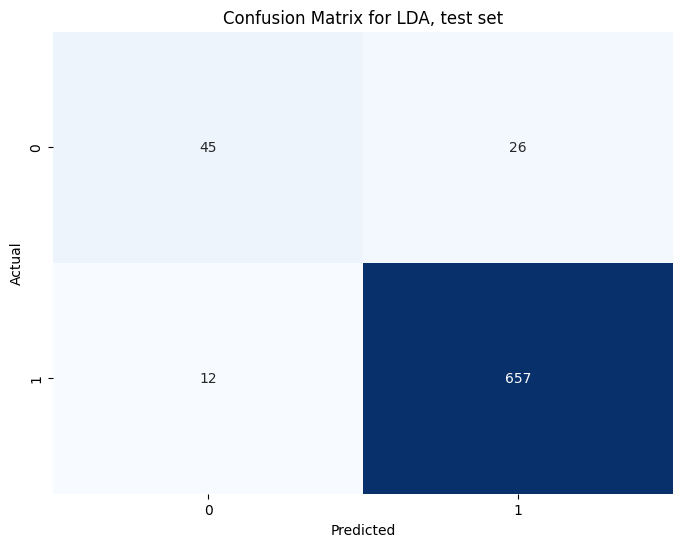

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LDA, test set')
plt.show()

In [72]:
ridge_model.coef_

array([[ 4.64331241e-04,  1.76302060e-02,  6.51500200e-03,
         6.51500200e-03,  2.27685971e-02,  3.61257029e-03,
         1.94054391e-02, -3.64552946e-01, -3.71316441e-01,
        -1.42487146e-01,  9.40524011e-01,  1.39600213e-02,
        -3.71316441e-01, -3.64552946e-01, -1.10965447e-01,
        -6.64120197e-01, -1.49043614e-01, -6.37518166e-01,
        -1.77933927e-01, -2.96055828e-02,  1.50565575e-02,
         2.49694302e-02, -3.76428657e-01,  4.15457466e-02,
         9.45380961e-02,  2.33083901e-01, -9.54547709e-02,
         5.87943153e-01,  5.24264493e-01, -1.41890527e-01,
        -9.42036159e-02, -1.97996611e-03,  3.01151160e-02,
         9.67768932e-01, -1.19566706e-02, -8.60856590e-02]])

Handling class imbalance

In [89]:
# These are the weights class_weight = 'balanced' will provide.

print("Error weight to class 'no':", 3700/(2*276))
print("Error weight to class 'yes':", 3700/(2*3424))

Error weight to class 'no': 6.702898550724638
Error weight to class 'yes': 0.540303738317757


In [92]:
# Create the model with class weights
ridge_classifier = RidgeClassifier(
    alpha=1.0,  # Regularization strength
    class_weight='balanced'  # Adjust weights inversely proportional to class frequencies
)

# Fit the model
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.93


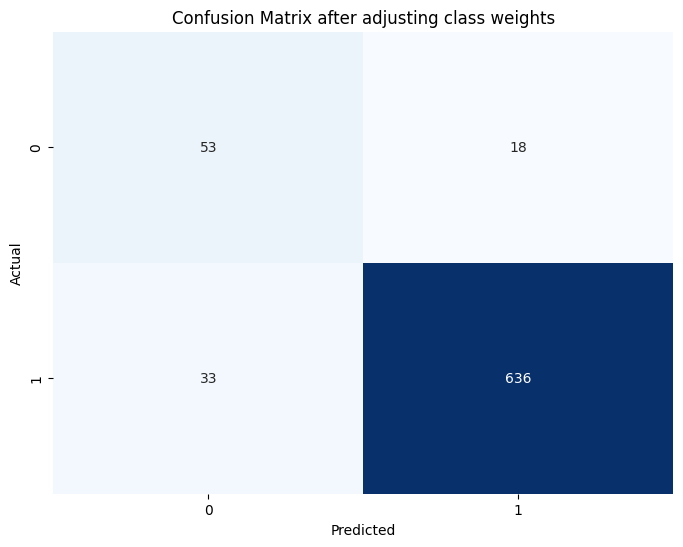

In [94]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after adjusting class weights')
plt.show()

As we can see, overall accuracy dropped, but We achieved better predictions for the "No" class.
Maybe let's try another strategy - resampling - and if it doesn't work, we will play with class weights and different hyperparameters.

What if the relationship is not even linear?

Check if the relationship is linear, if the variances are equal, if the covariances are equal, etc.

Maybe try Lasso regression, too many features, maybe we can somehow do feature selection

Please provide clear description about your approach. For instance, if you chose a particular model, what was the reason behind that? Also describe your findings and state the challenges you faced with the dataset and how you overcame them.